# Project Title: Mobile Price Prediction

### Author:
- Singh, Om - 101454960


### Executive Summary: 

**Background:**
In an age of rapid technical evolution and severe market competition, a new mobile startup is prepared to enter the race, seeking to carve a place among behemoths such as Apple and Samsung. The construction of a pricing model that encompasses value and competitiveness is the cornerstone of this venture's market entry approach. The mobile sector, with its plethora of features and consumer preferences, poses a confusing problem for pricing methods that balance affordability with feature-rich offerings.

**Objective:**
The main goal of this project is to create a predictive model that accurately determines the optimal price range for a mobile device based on its specifications. This model aims to simplify complex sales data and a plethora of device features into actionable pricing tiers that resonate with various consumer segments and market dynamics.

**Methodology:**
To address this issue, the company has compiled a comprehensive dataset that includes sales figures, market trends, and a wide range of mobile specifications from industry leaders. To analyze this data, the approach employs advanced statistical methods and machine learning algorithms. The methodology includes the following steps:

- Data Acquisition: Compiling an extensive dataset from industry sales and specifications of existing mobile devices.
- Feature Engineering: Identifying key factors that influence mobile pricing, such as hardware components, software features, brand value, and market trends.
- Predictive Modeling: Employing machine learning techniques to create a model that predicts the price range. This model is trained and validated on historical data to ensure accuracy and reliability.
- Price Range Segmentation: Establishing price categories that enable the company to position their products effectively within the market spectrum.

**Findings:**
A number of characteristics, such as the speed of the CPU, the amount of RAM available, the quality of the camera, and the battery life, have been identified by the prediction model as having a substantial impact on the price. The first findings suggest that the price range forecasts are accurate to a high degree, which provides a solid basis for making pricing choices.

**Implications:**
Through the implementation of this pricing strategy that is driven by data, the firm is able to make educated choices that are in line with the expectations of the market and so maximize profit margins. The company is able to launch its products with full assurance that they are a good match for the market since the model acts as a strategic instrument that navigates the competitive environment.

**Conclusion:**
The new mobile firm may consider the predictive pricing model to be a strategic advantage since it provides a sophisticated insight of the competitive situation in the mobile industry. This model is a demonstration of the efficacy of data analytics in the process of formulating market entrance strategies. It also prepares the way for the firm to build a solid footing in the marketplace for mobile devices.

Dataset columns are as follows:

id - ID

battery_power - Total energy a battery can store in one time measured in mAh

blue - Has bluetooth or not

clock_speed - Speed at which microprocessor executes instructions

dual_sim - Has dual sim support or not

fc - Front Camera mega pixels

four_g - Has 4G or not

int_memory - Internal Memory in Gigabytes

m_dep - Mobile Depth in cm

mobile_wt - Weight of mobile phone

n_cores - Number of cores of processor

pc - Primary Camera mega pixels

px_height - Pixel Resolution Height

px_width - Pixel Resolution Width

ram - Random Access Memory in Megabytes

sc_h - Screen Height of mobile in cm

sc_w - Screen Width of mobile in cm

talk_time - Longest time that a single battery charge will last when you are

three_g - Has 3G or not

touch_screen - Has touch screen or not

wifi - Has wifi or not

price_range - This is the target variable with value of:
0 (low cost)
1 (medium cost)
2 (high cost)
3 (very high cost)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from matplotlib import colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.base import clone 
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('train.csv')
df

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

In [3]:
df.shape

(2000, 21)

In [4]:
# Display the first few rows of the dataset and its summary statistics
data_info = df.info()
data_describe = df.describe()

data_info, data_describe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

(None,
        battery_power       blue  clock_speed     dual_sim           fc  \
 count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
 mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
 std       439.418206     0.5001     0.816004     0.500035     4.341444   
 min       501.000000     0.0000     0.500000     0.000000     0.000000   
 25%       851.750000     0.0000     0.700000     0.000000     1.000000   
 50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
 75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
 max      1998.000000     1.0000     3.000000     1.000000    19.000000   
 
             four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
 count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
 mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
 std       0.499662    18.145715     0.288416    35.399655     2.287837  ...

In [5]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
min(df['px_width'])

500

Text(0.5, 1.0, 'Checking for Null Values\n')

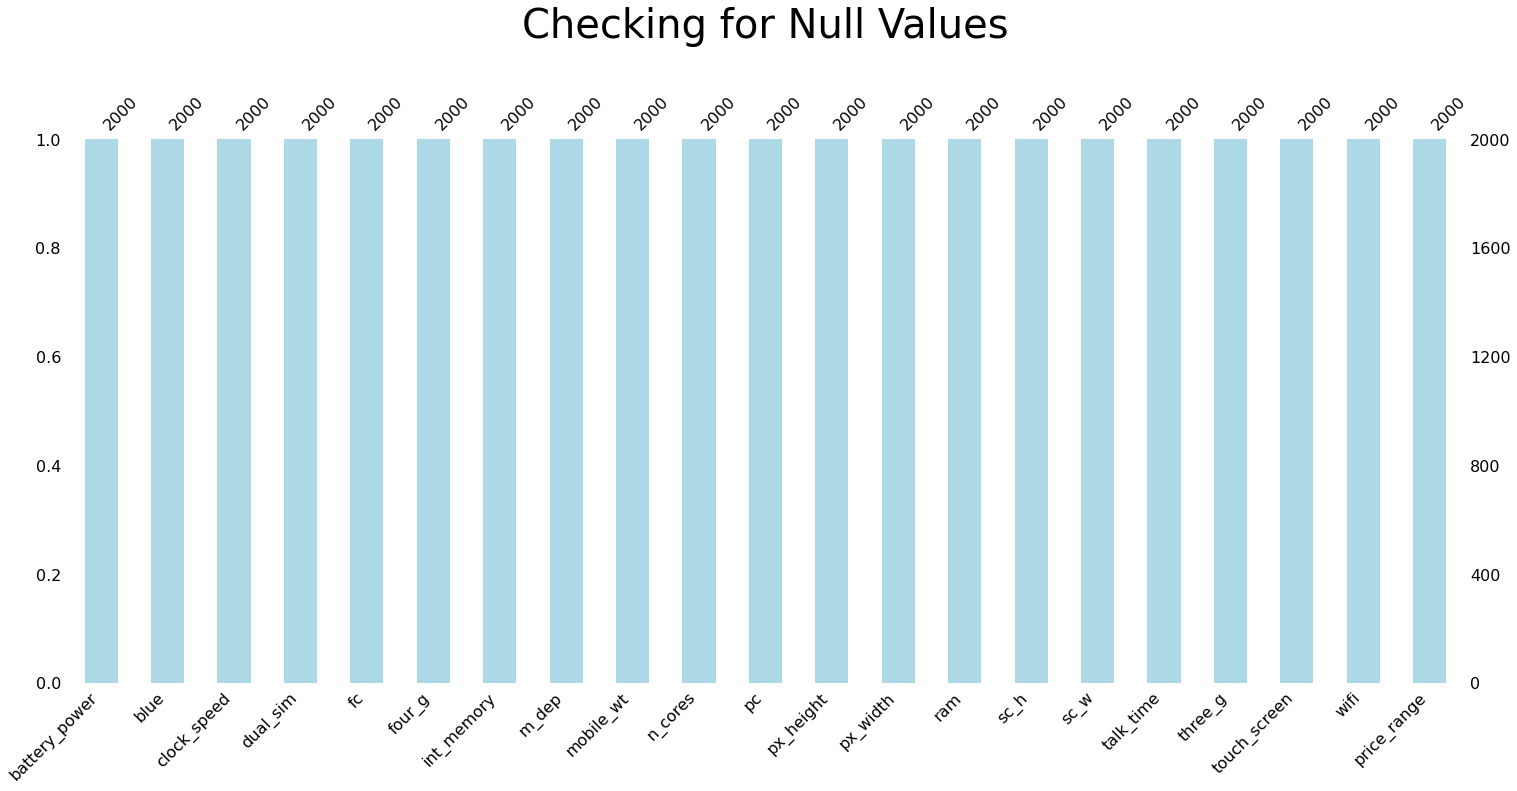

In [7]:
import missingno as msn
msn.bar(df, color='lightblue')
plt.title('Checking for Null Values\n', fontsize = 40)

In [8]:
df.duplicated().sum()

0

In [9]:
# Dealing with outliers (example using Z-score)
from scipy import stats
df_clean = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [10]:
# Filter out categorical features
df_categorical = df[['price_range', 'n_cores', 'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']].astype(str)

# Calculate number of unique values and unique values for each feature
unique_counts = df_categorical.nunique()
unique_values = df_categorical.apply(lambda x: x.unique())

# Create new dataframe with the results
pd.DataFrame({'Number of Unique Values': unique_counts, 'Unique Values': unique_values})

Number of Unique Values             Unique Values
price_range                         4              [1, 2, 3, 0]
n_cores                             8  [2, 3, 5, 6, 1, 8, 4, 7]
blue                                2                    [0, 1]
dual_sim                            2                    [0, 1]
four_g                              2                    [0, 1]
three_g                             2                    [0, 1]
touch_screen                        2                    [0, 1]
wifi                                2                    [1, 0]

In [11]:
# Filter out numerical features
df_numerical = df.drop(df_categorical.columns, axis=1)

# Generate descriptive statistics
df_numerical.describe().T.round(1)

count    mean     std    min     25%     50%     75%     max
battery_power  2000.0  1238.5   439.4  501.0   851.8  1226.0  1615.2  1998.0
clock_speed    2000.0     1.5     0.8    0.5     0.7     1.5     2.2     3.0
fc             2000.0     4.3     4.3    0.0     1.0     3.0     7.0    19.0
int_memory     2000.0    32.0    18.1    2.0    16.0    32.0    48.0    64.0
m_dep          2000.0     0.5     0.3    0.1     0.2     0.5     0.8     1.0
mobile_wt      2000.0   140.2    35.4   80.0   109.0   141.0   170.0   200.0
pc             2000.0     9.9     6.1    0.0     5.0    10.0    15.0    20.0
px_height      2000.0   645.1   443.8    0.0   282.8   564.0   947.2  1960.0
px_width       2000.0  1251.5   432.2  500.0   874.8  1247.0  1633.0  1998.0
ram            2000.0  2124.2  1084.7  256.0  1207.5  2146.5  3064.5  3998.0
sc_h           2000.0    12.3     4.2    5.0     9.0    12.0    16.0    19.0
sc_w           2000.0     5.8     4.4    0.0     2.0     5.0     9.0    18.0
talk_time      2000.0    11.0     5.5    2.0     6.0    11.0    16.0    20.0

# EDA

In [12]:
numerical_features = df_numerical

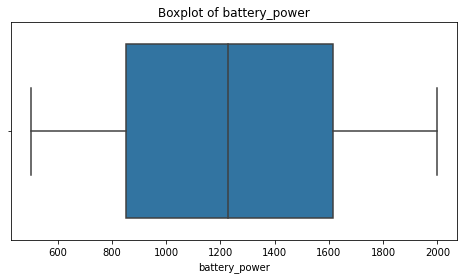

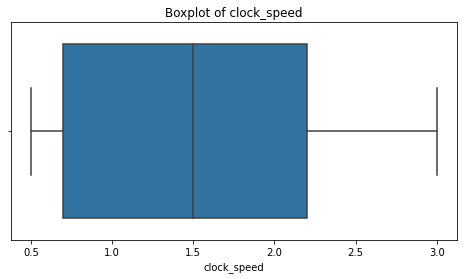

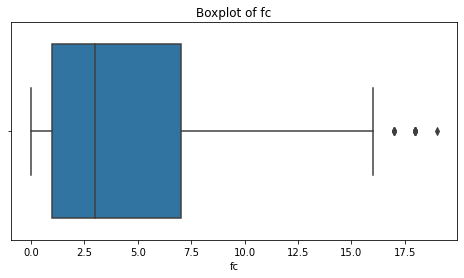

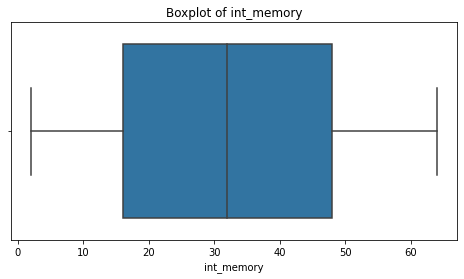

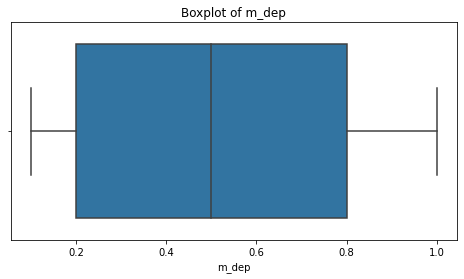

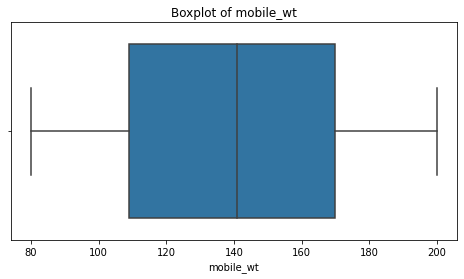

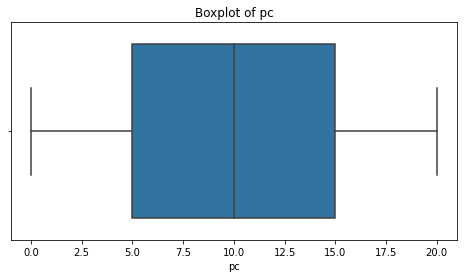

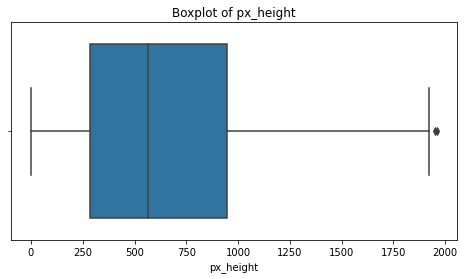

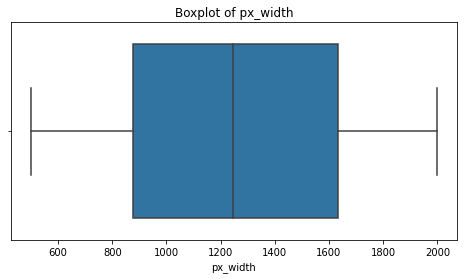

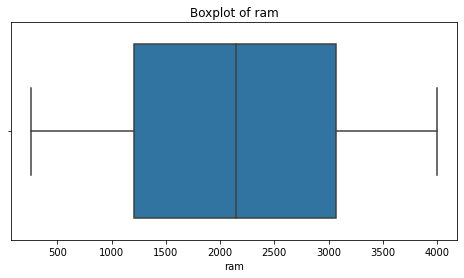

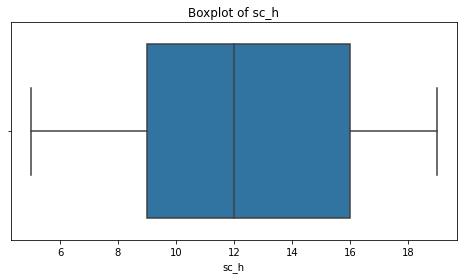

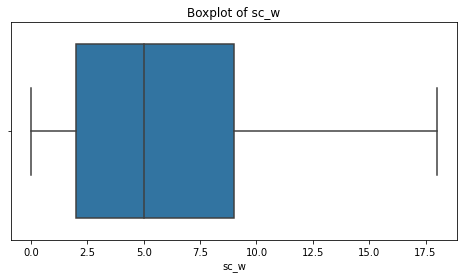

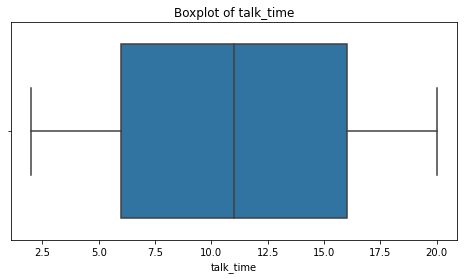

In [13]:
# box plot for outlier detection

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


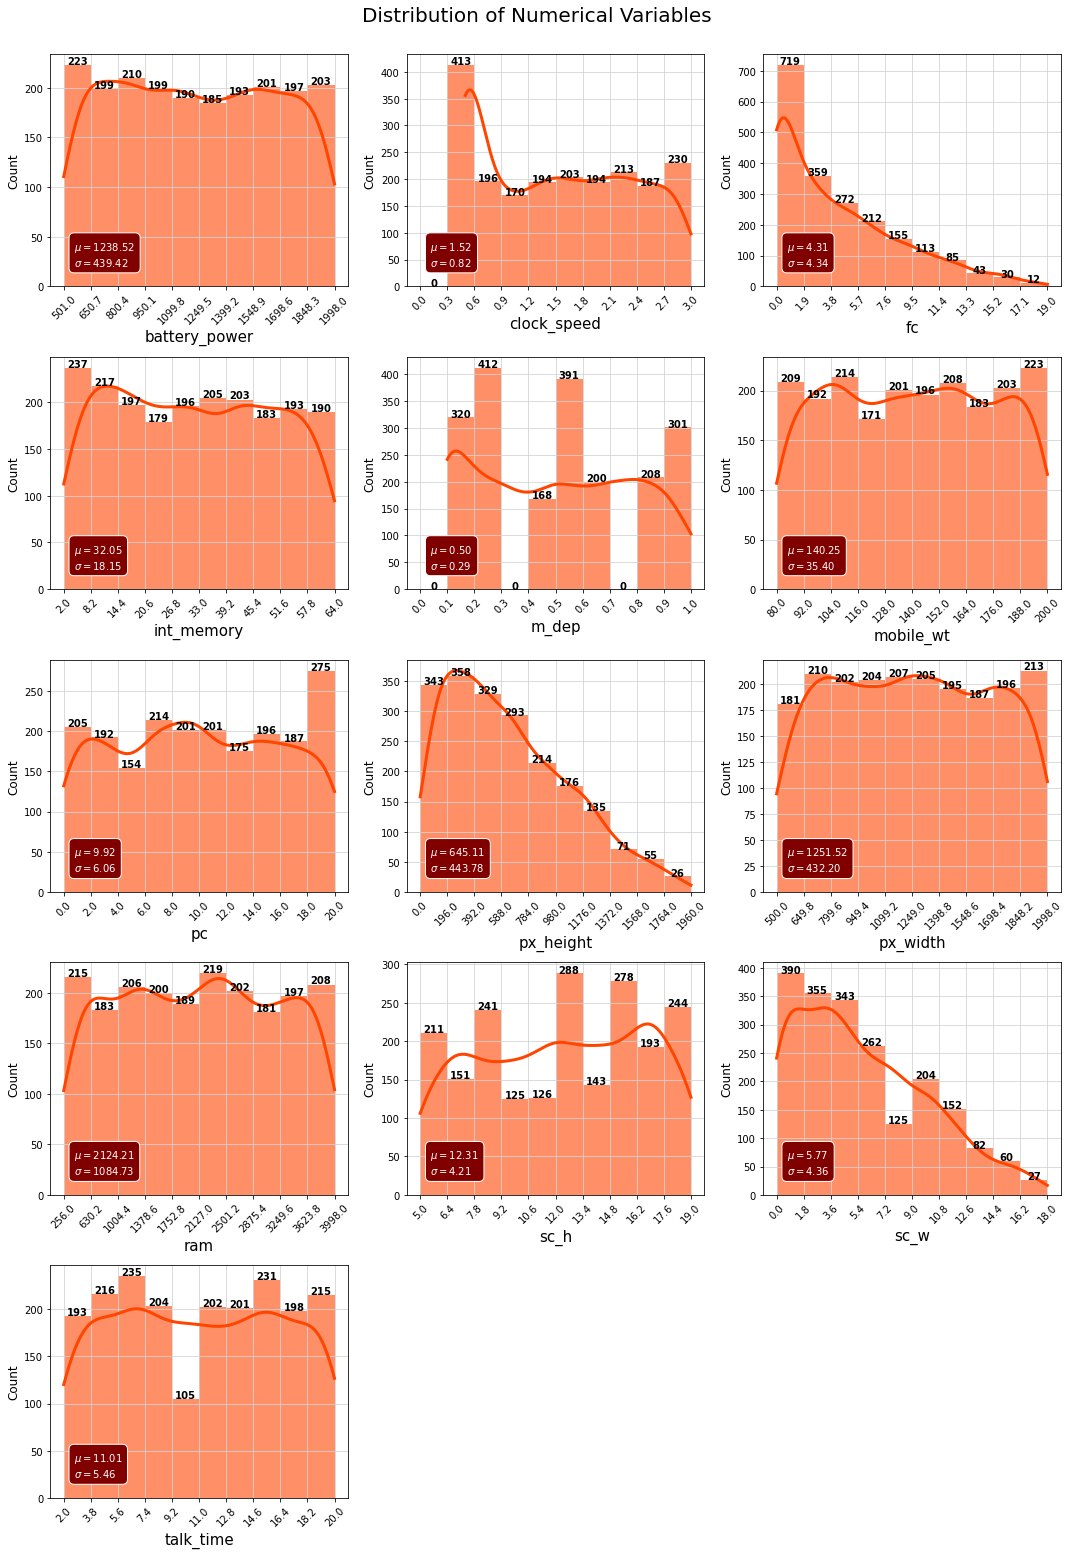

In [14]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(15,22)) #, dpi=200
c = 'orangered'

for i, col in enumerate(df_numerical.columns):
    x = i//3
    y = i%3
    values, bin_edges = np.histogram(df_numerical[col], 
                                     range=(np.floor(df_numerical[col].min()), np.ceil(df_numerical[col].max())))                
    graph = sns.histplot(data=df_numerical, x=col, bins=bin_edges, kde=True, ax=ax[x,y],
                         edgecolor='none', color=c, alpha=0.6, line_kws={'lw': 3})
    ax[x,y].set_xlabel(col, fontsize=15)
    ax[x,y].set_ylabel('Count', fontsize=12)
    ax[x,y].set_xticks(np.round(bin_edges,1))
    ax[x,y].set_xticklabels(ax[x,y].get_xticks(), rotation = 45)
    ax[x,y].grid(color='lightgrey')
    for j,p in enumerate(graph.patches):
        ax[x,y].annotate('{}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+1),
                             ha='center', fontsize=10 ,fontweight="bold")
    textstr = '\n'.join((
    r'$\mu=%.2f$' %df_numerical[col].mean(),
    r'$\sigma=%.2f$' %df_numerical[col].std()
    ))
    ax[x,y].text(0.08, 0.2, textstr, transform=ax[x,y].transAxes, fontsize=10, verticalalignment='top',
                color='white', bbox=dict(boxstyle='round',facecolor='maroon', edgecolor='white', pad=0.5))
    
ax[4, 1].axis('off')
ax[4, 2].axis('off')
plt.suptitle('Distribution of Numerical Variables', fontsize=20) 
plt.tight_layout()   
plt.subplots_adjust(top=0.95)
plt.show()

In some features, including px_height (Pixel Resolution Height) and sc_w (Screen Width of mobile in cm), many values close to zero are observed, which seem like noise

1. **Uniform Distributions**:
   - `battery_power` and `ram` show uniform distributions, suggesting an even spread across their entire range without any specific clustering. This implies that all battery capacities and RAM sizes are equally common among the devices in the dataset.

2. **Skewed Distributions**:
   - `clock_speed`, `fc`, `px_height`, and `px_width` are right-skewed, meaning there's a larger concentration of devices with lower values for these features, and a long tail of a few devices with high values.

3. **Normal Distribution**:
   - `mobile_wt` appears nearly normally distributed, centering around a mean value, which suggests that most mobile devices have a weight that is around the average weight of the dataset.

4. **Potential Outliers**:
   - The long tails in the distributions of `fc`, `px_height`, and `px_width` suggest the presence of outliers, particularly devices with very high camera megapixels or pixel resolutions.


## Ram affected by Price

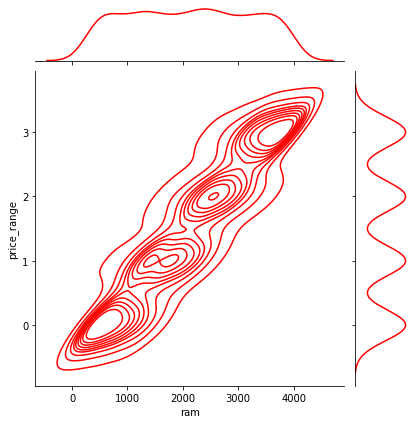

In [15]:
sns.jointplot(x='ram',y='price_range',data=df,color='red',kind='kde')

## Internal Memory vs Price Range

<AxesSubplot: xlabel='price_range', ylabel='int_memory'>

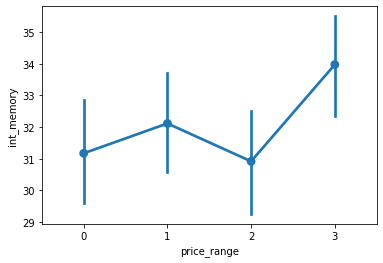

In [16]:
sns.pointplot(y="int_memory", x="price_range", data=df)

## Battery power vs Price Range

<AxesSubplot: xlabel='price_range', ylabel='battery_power'>

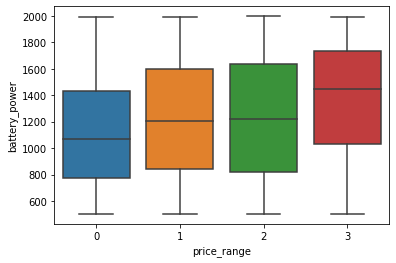

In [17]:
sns.boxplot(x="price_range", y="battery_power", data=df)

## No of Phones vs Camera megapixels of front and primary camera

Text(0.5, 0, 'MegaPixels')

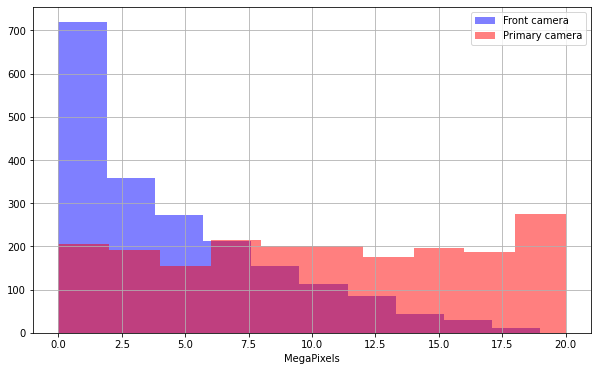

In [18]:
plt.figure(figsize=(10,6))
df['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

In [19]:
from plotly.subplots import make_subplots
from matplotlib import colors

# Create the subplots
fig = make_subplots(rows=3, cols=3, specs=[[{'type':'domain'}]*3]*3, vertical_spacing=0.05, horizontal_spacing=0.01)

# Loop through all the features and add the pie chart to the subplot
for i, feature in enumerate(df_categorical.columns):
    value_counts = df_categorical[feature].value_counts()
    labels = value_counts.index.tolist()
    values = value_counts.values.tolist()

    # Define color map based on orangered color
    cmap = colors.LinearSegmentedColormap.from_list("orangered", ["orangered", "white"])
    norm = colors.Normalize(vmin=0, vmax=len(labels))
    color_list = [colors.rgb2hex(cmap(norm(i))) for i in range(len(labels))]

    # Create the pie chart
    pie_chart = go.Pie(
        labels=labels,
        values=values,
        hole=0.6,
        marker=dict(colors=color_list, line=dict(color='white', width=3)),
        textposition='inside',
        textinfo='percent+label',
        title=feature,  # Add title with the feature name
        title_font=dict(size=25, color='black', family='Calibri')
    )

    # Add the pie chart to the subplot
    if i < 8:
        row = i // 3 + 1
        col = i % 3 + 1
        fig.add_trace(pie_chart, row=row, col=col)

# Update the layout
fig.update_layout(showlegend=False, height=1000, width=980, 
                   title={
                          'text':"Distribution of Categorical Variables",
                          'y':0.95,
                          'x':0.5,
                          'xanchor':'center',
                          'yanchor':'top',
                          'font': {'size':28, 'color':'black', 'family':'Calibri'}
                         })

# Show the plot
fig.show()

Mobile phones are divided with exactly the same frequency across the 4 price_range classes. Therefore, the dataset is completely balanced.

The mobile phones in the data set have almost the same frequency in terms of having or not having Bluetooth, 4G, touch screen, Wifi as well as supporting two SIM cards or not and the number of processing cores used.

Around 76% of the mobile phones support 3G.

In [20]:
# Define the target name in a variable for simplicity
Target = 'price_range'

# Define a list containing names of the categorical features in the dataset 
Cat_Features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'n_cores']

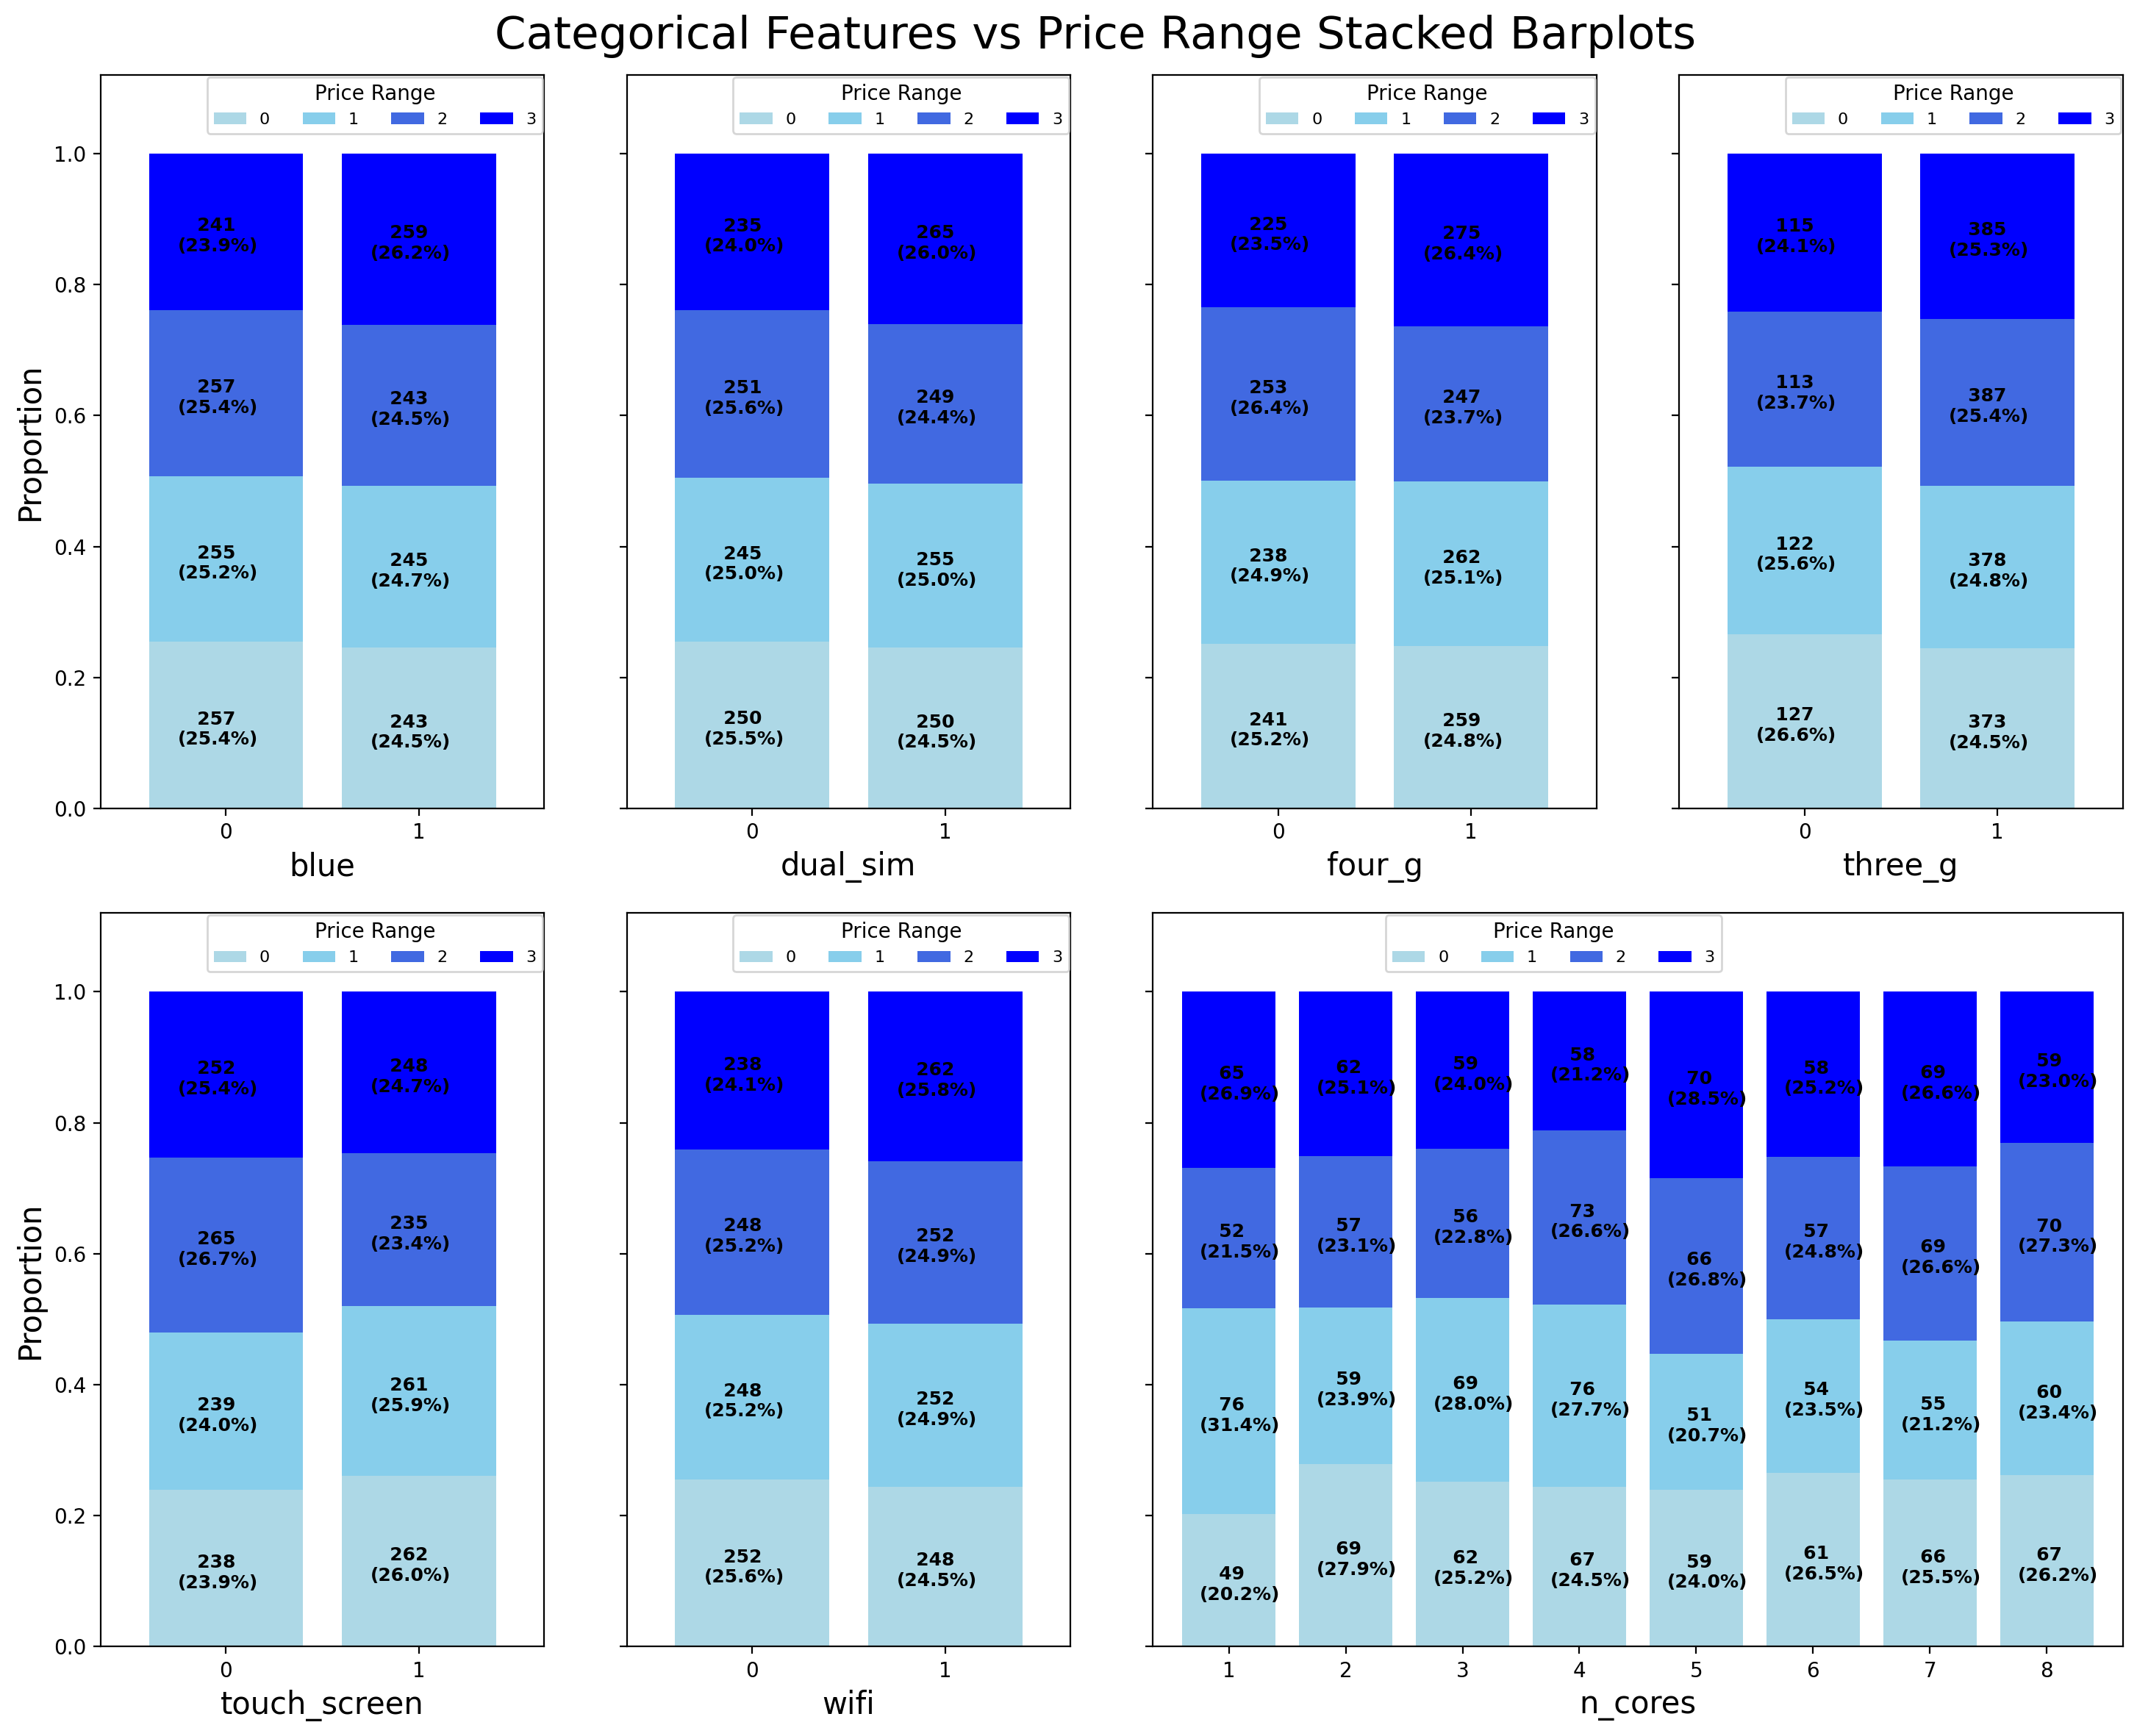

In [21]:
# Create a 2x4 grid of subplots
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,12), dpi=200)

# Span subplot over two columns
ax[1,2] = plt.subplot2grid((2,4), (1,2), colspan=2)

for i,col in enumerate(Cat_Features):
    
    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=df[col], columns=df[Target])
    
    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=df[col], columns=df[Target], normalize='index')

    # Define colormap
    cmp = ListedColormap(['#add8e6', '#87ceeb', '#4169e1', '#0000ff'])
    
    # Plot stacked bar charts
    x, y = i//4, i%4
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.25, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'   {count}\n({np.round(proportion * 100, 1)}%)', 
                         color = "black", fontsize=9, fontweight="bold")
    
    # Add legend
    ax[x,y].legend(title='Price Range', loc=(0.24,0.92), fontsize=8, ncol=4)
    # Set y limit
    ax[x,y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)
    # Increase xlabel & ylabel font sizes
    ax[x,y].set_ylabel('Proportion', fontsize=15)
    ax[x,y].set_xlabel(col, fontsize=15)        

plt.suptitle('Categorical Features vs Price Range Stacked Barplots', fontsize=22)
plt.tight_layout()                     
plt.show()


Among the categorical features seen in the above plot, ‍‍‍‍‍‍‍three_g, n_cores, and touch_screen have a greater impact on the target because by changing the category in these features, the percentage of samples belonging to each class of the target has changed more significantly.

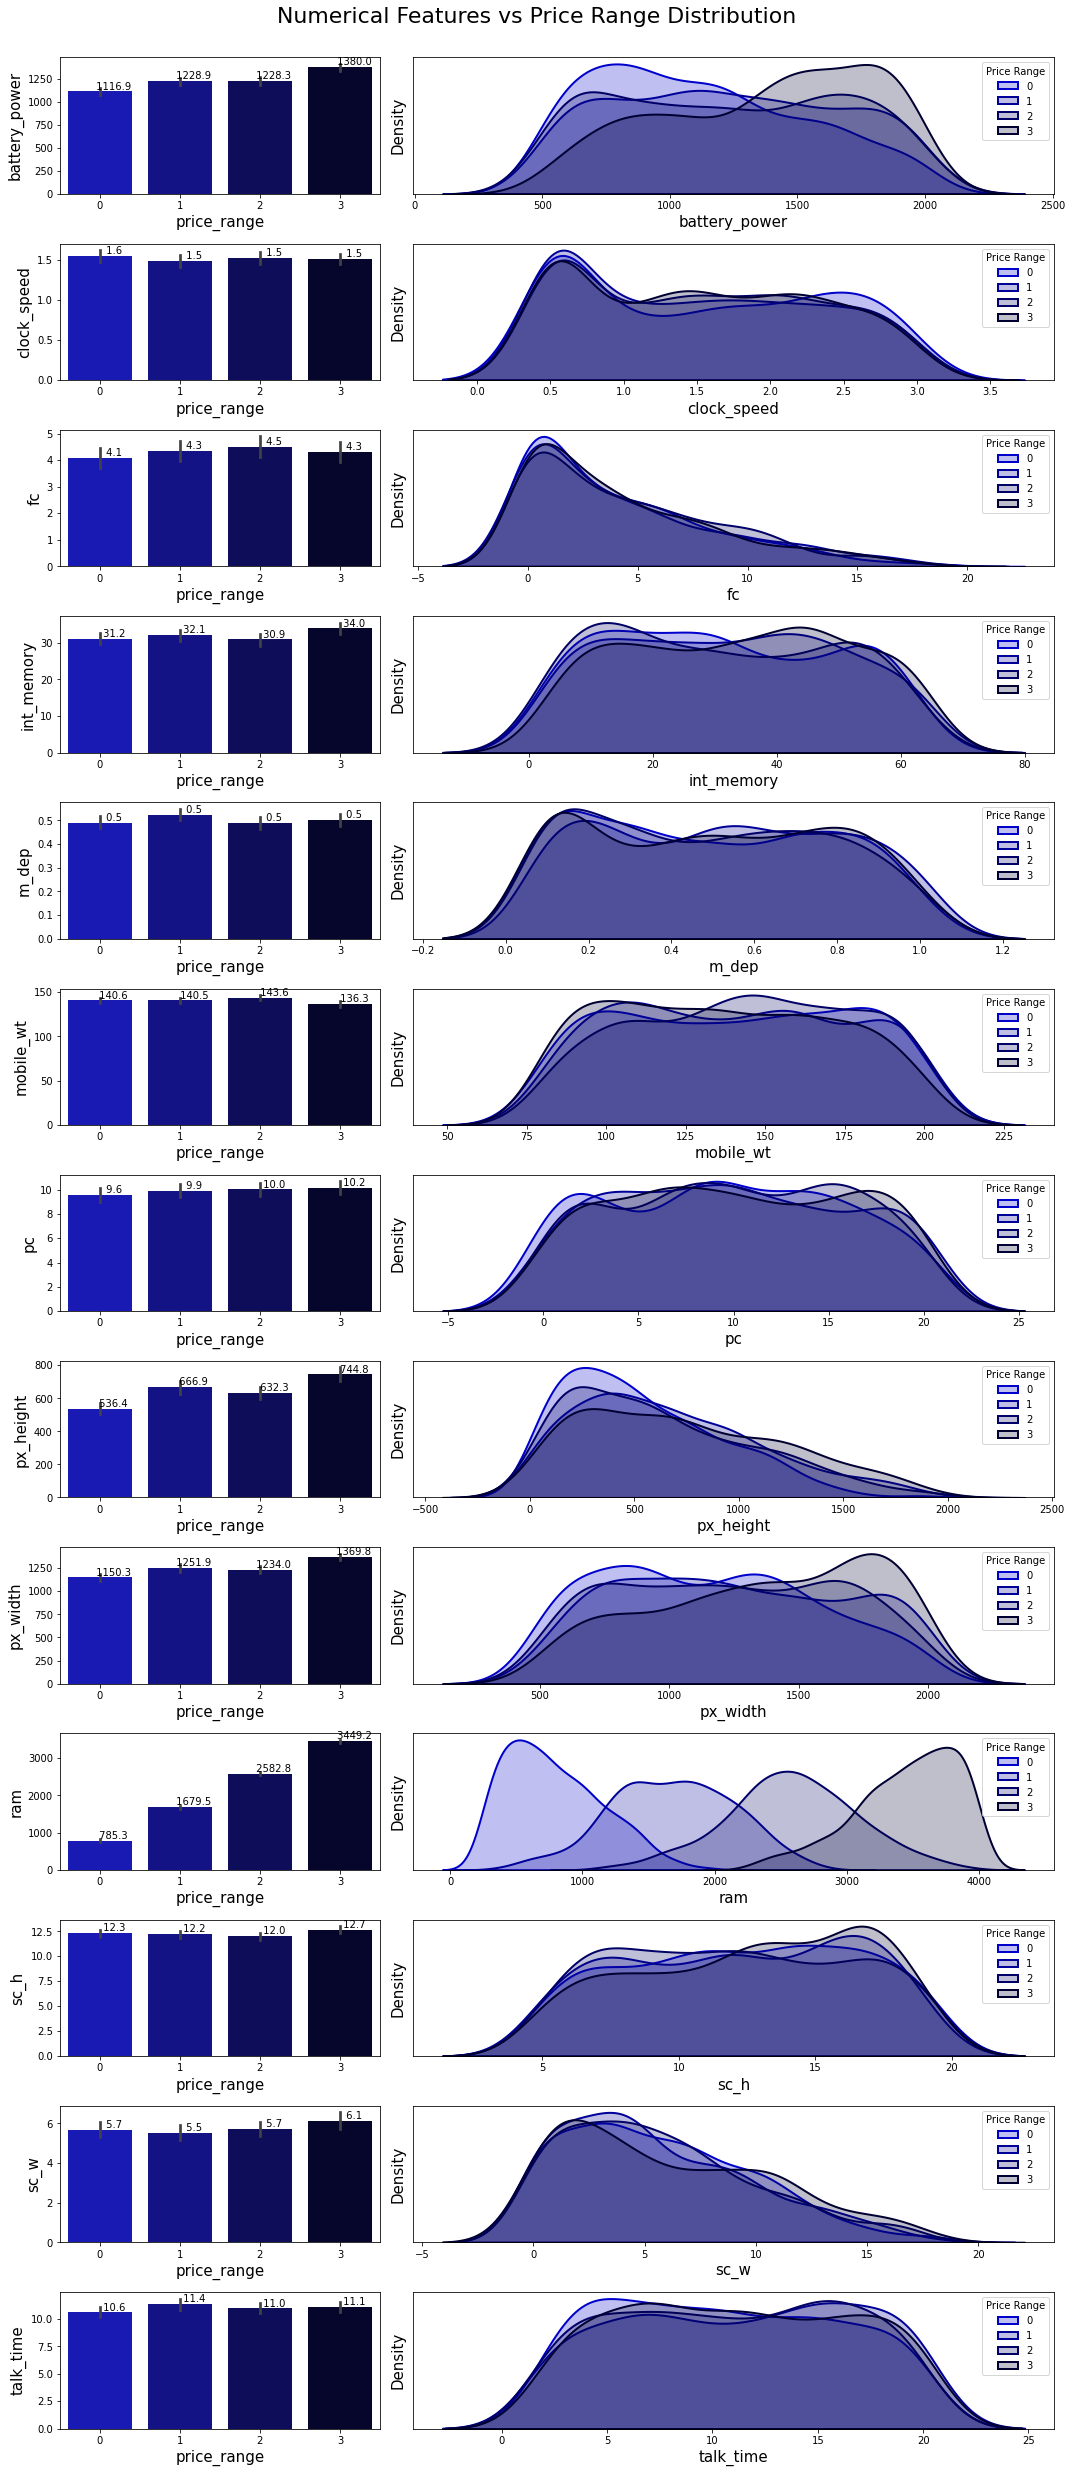

In [22]:
# Define Seaborn palette
sns.set_palette(['#0000CC', '#000099', '#000066', '#000033'])

# Create a 13x2 grid of subplots
fig, ax = plt.subplots(13, 2, figsize=(15,35), gridspec_kw={'width_ratios': [1, 2]})

for i,col in enumerate(numerical_features):
    # barplot
    graph = sns.barplot(data=df, x=Target, y=col, ax=ax[i,0])
    # kde Plot
    sns.kdeplot(data=df[df[Target]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=df[df[Target]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    sns.kdeplot(data=df[df[Target]==2], x=col, fill=True, linewidth=2, ax=ax[i,1], label='2')
    sns.kdeplot(data=df[df[Target]==3], x=col, fill=True, linewidth=2, ax=ax[i,1], label='3')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Price Range', loc='upper right')
    # Add bar sizes to our plot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.1f')
        
# Increase font size of x and y labels
for i in range(len(ax)):
    for j in range(len(ax[i])):
        ax[i,j].set_xlabel(ax[i,j].get_xlabel(), fontsize=15)
        ax[i,j].set_ylabel(ax[i,j].get_ylabel(), fontsize=15)

plt.suptitle('Numerical Features vs Price Range Distribution', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()

Among the numerical features seen in the above diagram, first the ram feature and then the battery_power, px_height and px_width have the greatest impact on the target because the distribution and average amount of data belonging to each class of the target in these features have changed significantly!

# Pearson Correlation

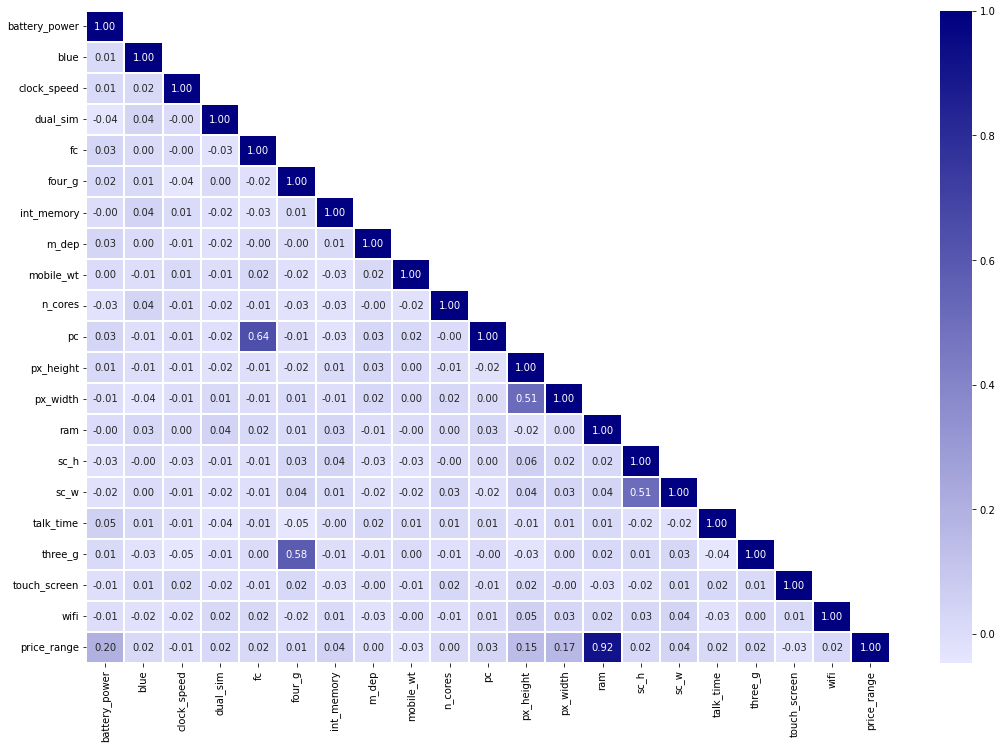

In [23]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# Define a colormap
orangered_cmap = LinearSegmentedColormap.from_list('navy', ['#E6E6FF', '#000080'])

# Calculation of the Spearman correlation
target = 'price_range'
df_ordered = pd.concat([df.drop(target,axis=1), df[target]],axis=1)
corr = df_ordered.corr()

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(18,12))
sns.heatmap(corr, mask=mask, annot=True, cmap=orangered_cmap, fmt='.2f', linewidths=0.2)
plt.show()

price_range is highly correlated with ram (ρ = 0.92).

price_range has a low correlation value with the rest of the features, but this cannot be used as a criterion to remove these features since the pearson correlation only expresses the linear relationship between two variables.

Among the features, two features ‍‍‍‍‍‍pc and fc have the highest correlation with each other (ρ = 0.64).

## Noise Detection

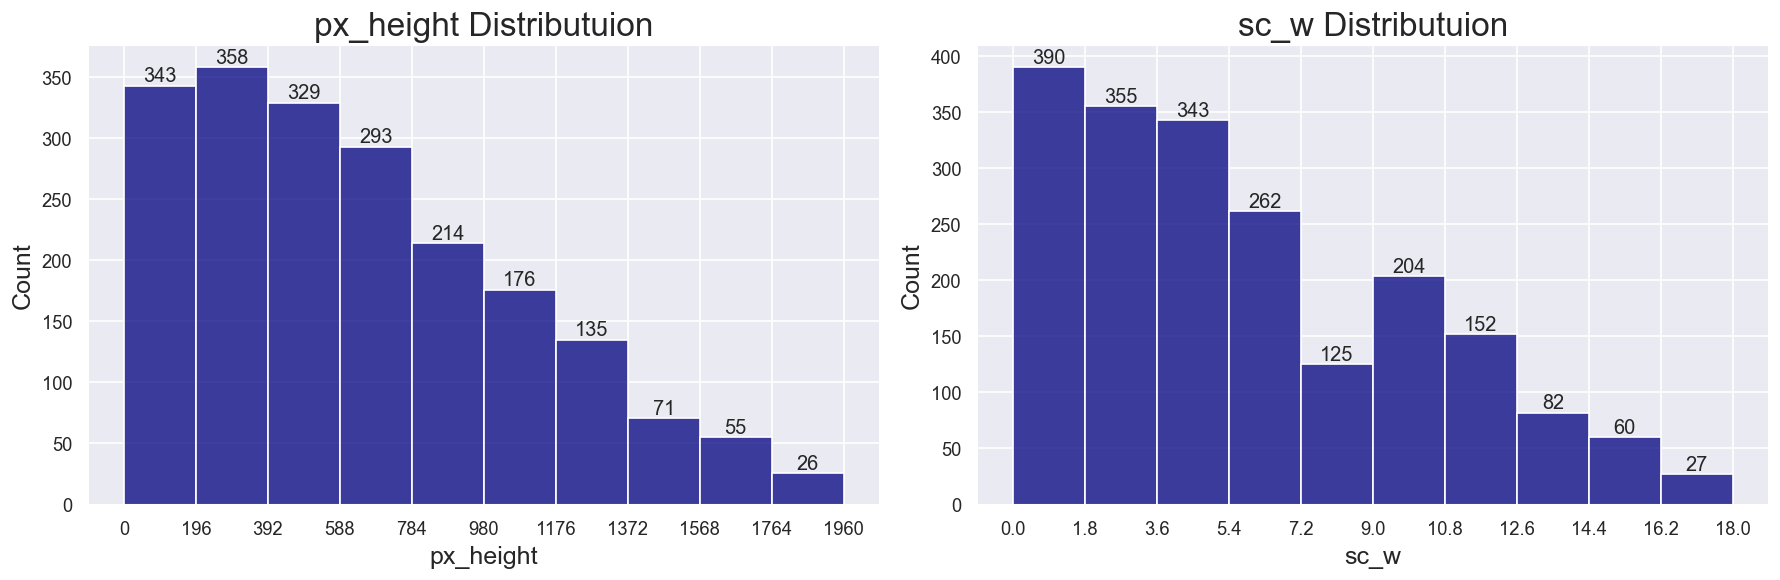

In [24]:
sns.set(rc = {'axes.labelsize' : 15})               
fig, ax = plt.subplots(1, 2, figsize=(15,5), dpi=120)

# Plot px_height histogram:
_, bin_edges = np.histogram(df['px_height'], range=(np.floor(df['px_height'].min()), np.ceil(df['px_height'].max())))                                     
graph1 = sns.histplot(x='px_height', data=df, bins=bin_edges, color='navy', ax=ax[0])
ax[0].set_xticks(np.round(bin_edges,1))
ax[0].set_title('px_height Distributuion', fontsize=20) 
for cont in graph1.containers:
        graph1.bar_label(cont)

# Plot sc_w histogram:
_, bin_edges = np.histogram(df['sc_w'], range=(np.floor(df['sc_w'].min()), np.ceil(df['sc_w'].max())))
graph2 = sns.histplot(x='sc_w', data=df, bins=bin_edges, color='navy', ax=ax[1])
ax[1].set_xticks(np.round(bin_edges,1))
ax[1].set_title('sc_w Distributuion', fontsize=20)      
for cont in graph2.containers:
        graph2.bar_label(cont)
        
plt.tight_layout()
plt.show()

**Problem:**

As seen px_height (Pixel Resolution Height) and sc_w (Screen Width of mobile in cm) contain many values of zero and close to zero, which look like noise, but since we do not have enough knowledge in this domain, we cannot set a definite lower limit as an acceptable value for these features. we found out that:

Some of the earliest commercially available mobile phones, like the Motorola DynaTAC 8000X, had a screen resolution of only 5 pixels in height.

Some of the earliest mobile phones with screens had a width of around 2-3 centimeters.

**Strategy:**

In the following, one of the models we intend to implement is SVM and one of the advantages of SVM is that it is less sensitive to noise and outliers in the data compared to other algorithms, such as decision trees. Therefore, according to the above explanations, we consider the value of 5 for px_height and the value of 2 for sc_w as the minimum acceptable values and detect the index of noise samples, but do not take action to clean or impute them. we'll take action when building noise-sensitive models like Random Forest

In [25]:
# Detect Noise values in sc_w 
sc_w_NoiseIndex = df[df['sc_w'] < 2].index

# Detect Noise values in px_height
px_height_NoiseIndex = df[df['px_height'] < 5].index

In [26]:
print('The number of detected noise values for sc_w: ', len(sc_w_NoiseIndex))
print('The number of detected noise values for px_height: ', len(px_height_NoiseIndex))

The number of detected noise values for sc_w:  390
The number of detected noise values for px_height:  9


# Feature Importance Using Drop-Column Feature

In [27]:
def drop_column_importance(model, X_train, y_train, random_state=0):
    
    # list containing feature importances
    importances = []
    # Clone the model
    model_clone = clone(model)
    # Set random_state for comparability
    model_clone.random_state = random_state
    # Train the model
    model_clone.fit(X_train, y_train)
    # Create the cross-validation object using StratifiedKFold 
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    # Score the benchmark model using cross-validation
    benchmark_score = cross_val_score(model_clone, X_train, y_train, cv=cv, scoring='accuracy').mean()

    
    # Iterate over all features and store feature importance
    for col in X_train.columns:
        # Clone the model
        model_clone = clone(model)
        # Set random_state for comparability
        model_clone.random_state = random_state
        # Traint the model on the the dataset with a single feature removed
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        # Score the droped-column model
        drop_column_score = cross_val_score(model_clone, X_train.drop(col,axis=1), y_train, cv=cv, scoring='accuracy').mean()
        # Store feature importance which is defined as the difference between the benchmark and the new model score
        importances.append(benchmark_score - drop_column_score)
        
    # Return the features along with their importances in the form of a dataframe
    importances_df = pd.DataFrame({'feature': X_train.columns, 'feature importance': importances}) \
                     .sort_values('feature importance', ascending = False).reset_index(drop = True)
           
    return importances_df

In [28]:
def drop_column_importance_plot(model, X_train, y_train):
    
    # Call drop-column feature importance function
    df_drop_column = drop_column_importance(model, X_train, y_train, random_state=0)
    # Rename columns
    df_drop_column.columns = ['Feature', 'Feature Importance']
    
    # Plot barchart
    plt.figure(figsize=(12,10))
    sns.barplot(data=df_drop_column, x='Feature Importance', y='Feature', orient='h', color='orangered')
    plt.title('Drop Column Feature Importance', fontsize=20)
    plt.show()

# SVM Model

In [29]:
X = df.drop('price_range', axis=1)
y = df['price_range'] 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [31]:
# Scale the training and test data using Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert training and test sets from numpy array to pandas dataframes
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [32]:
def tune_hyperparameters(clf, param_grid, X_train, y_train):
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    print("Best hyperparameters:\n", clf_grid.best_params_)
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_

In [33]:
param_grid = {'kernel': ['linear'],
               'C': [ 0.1, 1, 10, 50, 100]
             }

In [34]:
# Create a SVC object
svm = SVC(probability=True, random_state=0)

# Find the best classifier with the optimal hyperparameters
svm_optimized = tune_hyperparameters(svm, param_grid, X_train, y_train)

Best hyperparameters:
 {'C': 50, 'kernel': 'linear'}


In [35]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro')],
                          index=['Accuracy','Macro Precision','Macro Recall','Macro F1-score'],
                          columns = [model_name])
    
    result = (result * 100).round(2).astype(str) + '%'                            
    return result

In [36]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports and confusion matrix
    '''
    # Set font scale
    sns.set(font_scale=1.5)
    
    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
    print('\n')
    
    # Create figure and subplots 
    fig, (ax1, ax2) = plt.subplots(1, 2, dpi=90, figsize=(12, 5))
    
    
    # Report desired results as a summary in the form of a table
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax1.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 4.2)
    table.set_fontsize(12)
    ax1.axis('tight')
    # Hide the axes
    ax1.axis('off')
    # set the title
    ax1.set_title('{} Performance Summary on Test Data'.format(model_name), fontsize=18)
    # Modify color 
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('#4169e1')
              
    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap=orangered_cmap, ax=ax2)
    ax2.set_title('Confusion Matrix for Test Data')                                     
    ax2.grid(False)
            
    plt.tight_layout()
    plt.show() 


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       400
           1       0.98      0.97      0.98       400
           2       0.98      0.98      0.98       400
           3       0.99      0.99      0.99       400

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       100
           1       0.99      0.97      0.98       100
           2       0.97      0.98      0.98       100
           3       0.99      0.98      0.98       100

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98 

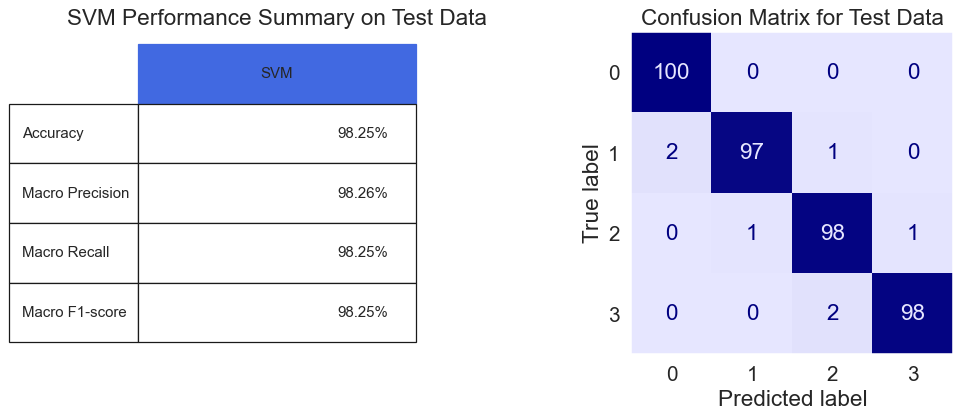

In [37]:
model_evaluation(svm_optimized, X_train, X_test, y_train, y_test, 'SVM')

In [38]:
# Save the final performance of SVM classifier
svm_result = metrics_calculator(svm_optimized, X_test, y_test, 'SVM')

### Noise Treatment using KNN Imputer

In [39]:
# Make a copy of dataset
df_denoised = df.copy()

# Replace the noise values with NaN
df_denoised.loc[sc_w_NoiseIndex,'sc_w'] = np.nan
df_denoised.loc[px_height_NoiseIndex,'px_height'] = np.nan

# Create a KNN imputer object with k=2
imputer = KNNImputer(n_neighbors=2)

# Impute the noise values
imputed_data = imputer.fit_transform(df_denoised)

# Convert array to dataframe
df_denoised = pd.DataFrame(imputed_data, columns=df_denoised.columns)

# Define the features (X) and the output labels (y)
X_denoised = df_denoised.drop('price_range', axis=1)
df_denoised['price_range'] = df_denoised['price_range'].astype(int)
y = df_denoised['price_range'] 

# Random Forest

In [40]:
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [70, 100, 120, 150], 
    'max_depth': np.arange(10, 18),
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

In [41]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X_denoised, y, test_size=0.2, random_state=0, stratify=y)

# Create a random forest classifier object
rf = RandomForestClassifier(criterion='gini', max_features=None, bootstrap=True, random_state=0)

# Find the best classifier with the optimal hyperparameters
rf_optimised = tune_hyperparameters(rf, param_grid, X_train, y_train)

Best hyperparameters:
 {'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 120}


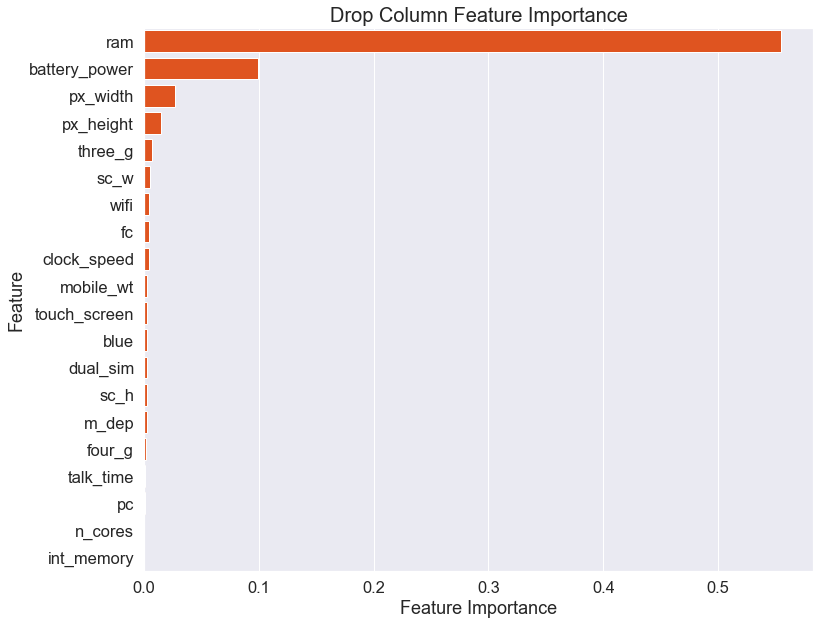

In [42]:
drop_column_importance_plot(rf_optimised, X_train, y_train)

In [43]:
feature_importances = drop_column_importance(rf_optimised, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0.01]['feature']  # Threshold value of 0.01

# Filter dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [44]:
pd.DataFrame(selected_features)

feature
0            ram
1  battery_power
2       px_width
3      px_height

In [45]:
# Create a random forest classifier object
rf = RandomForestClassifier(criterion='gini', max_features=None, bootstrap=True, random_state=0)

# Find the best classifier with the optimal hyperparameters
rf_optimised = tune_hyperparameters(rf, param_grid, X_train, y_train)

Best hyperparameters:
 {'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       400
           3       1.00      1.00      1.00       400

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       100
           1       0.91      0.91      0.91       100
           2       0.84      0.87      0.85       100
           3       0.93      0.89      0.91       100

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91 

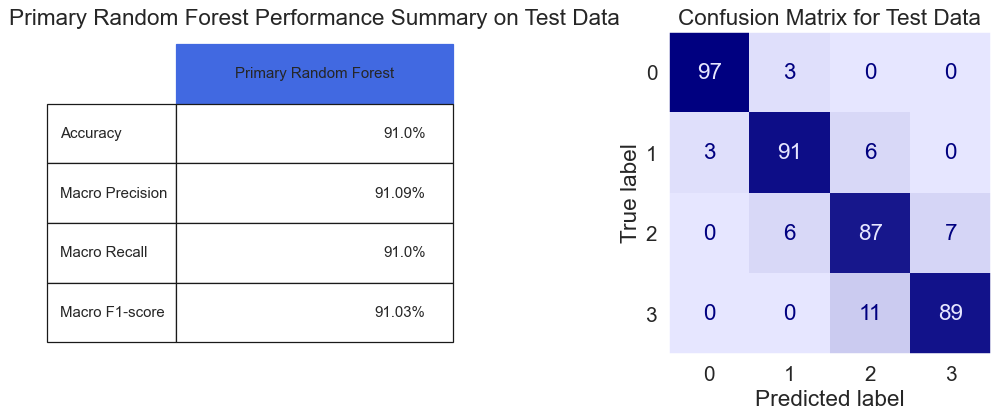

In [46]:
model_evaluation(rf_optimised, X_train, X_test, y_train, y_test, 'Primary Random Forest')

The model shows a 9% decrease in accuracy on the test set compared to the training set, indicating overfitting

In [47]:
# Build decision tree classifier considering the obtained optimal values for hyperparameters
rf_final = RandomForestClassifier(criterion='gini', max_features=None, bootstrap=True, random_state=0,
                                  max_depth=13, min_samples_leaf=4, min_samples_split=2, n_estimators=90)

# Train the final decision tree classifier
rf_final.fit(X_train, y_train)

RandomForestClassifier(max_depth=13, max_features=None, min_samples_leaf=4,
                       n_estimators=90, random_state=0)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       400
           1       0.96      0.97      0.97       400
           2       0.97      0.97      0.97       400
           3       0.99      0.97      0.98       400

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       100
           1       0.91      0.93      0.92       100
           2       0.85      0.88      0.87       100
           3       0.93      0.89      0.91       100

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92 

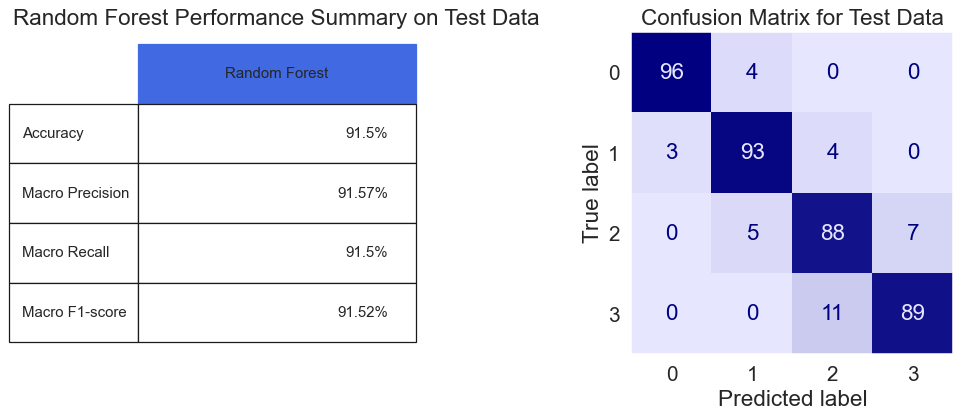

In [48]:
model_evaluation(rf_final, X_train, X_test, y_train, y_test, 'Random Forest')

In [49]:
# Save the final performance of Random Forest classifier
rf_result = metrics_calculator(rf_final, X_test, y_test, 'Random Forest')

In [50]:
# Concatenate previous classifiers perfermance results into a single dataframe
results = pd.concat([svm_result, rf_result], axis=1).T

# Sort the dataframe in descending order based on accuracy
results.sort_values(by='Accuracy', ascending=False, inplace=True)

results

Accuracy Macro Precision Macro Recall Macro F1-score
SVM             98.25%          98.26%       98.25%         98.25%
Random Forest    91.5%          91.57%        91.5%         91.52%

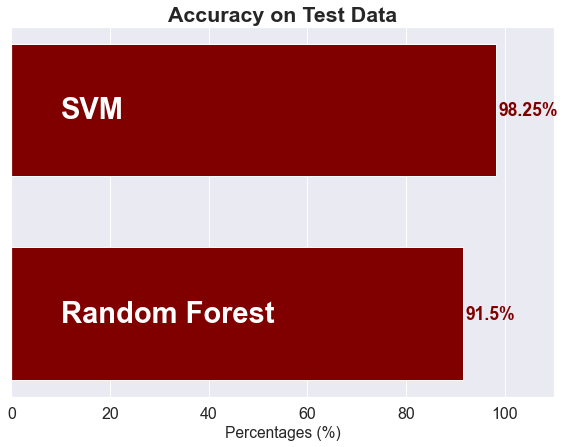

In [51]:
# Prepare values
results.sort_values(by='Accuracy', ascending=True, inplace=True)
accuracies = results['Accuracy'].str.strip('%').astype(float)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(10, 7), dpi=70)
ax.barh(results.index, accuracies, color='maroon', height=0.65)

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(accuracies, results.index)):
    ax.text(value+0.5, i, f"{value}%", ha='left', va='center', fontweight='bold', color='maroon', fontsize=18)
    ax.text(10, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=30)

# Remove yticks
ax.set_yticks([])

# Set x-axis limit
ax.set_xlim([0,110])

# Add title and xlabel
plt.title("Accuracy on Test Data", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

## Among the examined classifiers, SVM got the best accuracy due to its resistance to noise:

## 🏆 Accuracy = 98.25%

# Predicting

In [52]:
# Define the features (X) and the output labels (y) of the given dataset:
X = df.drop('price_range', axis=1)
y = df['price_range'] 

# Create a pipeline to scale the data and train an SVM classifier using obtained optimal hyperparameters
svm_pipeline = Pipeline([
                         ('scaler', StandardScaler()), 
                         ('svm', SVC(probability=True, C=50, kernel='linear', random_state=0)) 
                        ])

# Train the SVM classifier on the whole dataset
svm_pipeline.fit(X, y)

# Read samples
df_samples = pd.read_csv('test.csv')

# Remove id column
df_samples.drop('id', axis=1, inplace=True)

# Predict samples class
df_samples['price_range_pred'] = svm_pipeline.predict(df_samples)
df_samples['price_range_pred']

0      3
1      3
2      2
3      3
4      1
      ..
995    2
996    1
997    0
998    2
999    2
Name: price_range_pred, Length: 1000, dtype: int64